In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

There are at least three definitions for differencing, (1) forward $\frac{\delta f}{\delta x}=f(x+1)-f(x)$, (2) backward $\frac{\delta f}{\delta x}=f(x-1)-f(x)$, and (3) central $\frac{\delta f}{\delta x}=\frac{f(x+1)-f(x-1)}{2}$. 

In [2]:
f = cv2.imread(r'./images/t1.jpg', cv2.IMREAD_GRAYSCALE)
f = f.astype(np.double)

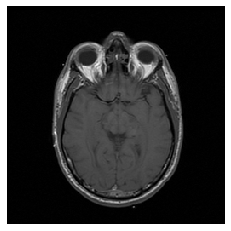

In [3]:
plt.figure()
plt.imshow(f, cmap=plt.cm.gray)
plt.axis('off')
plt.show()
plt.close()

In [6]:
dfdr = (np.roll(f, 1, axis=0) - np.roll(f, -1, axis=0)) / 2

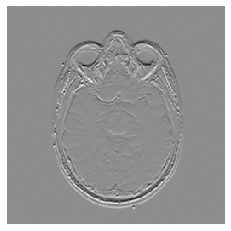

In [7]:
plt.figure()
plt.imshow(dfdr, cmap=plt.cm.gray)
plt.axis('off')
plt.show()
plt.close()

In [8]:
dfdc = (np.roll(f, 1, axis=1) - np.roll(f, -1, axis=1)) / 2

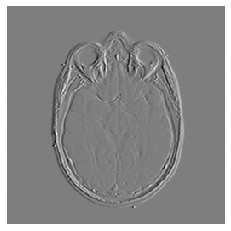

In [9]:
plt.figure()
plt.imshow(dfdc, cmap=plt.cm.gray)
plt.axis('off')
plt.show()
plt.close()

In [10]:
grad_mg = np.sqrt(dfdr ** 2 + dfdc ** 2)

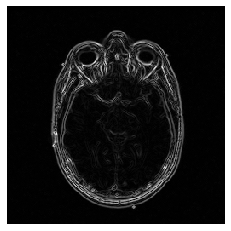

In [11]:
plt.figure()
plt.imshow(grad_mg, cmap=plt.cm.gray)
plt.axis('off')
plt.show()
plt.close()

In [12]:
F = np.fft.fftshift(np.fft.fft2(f))

In [18]:
# construct a ramp along the r-axis with zero at the DC
ctr = np.asarray(F.shape) // 2

omega = np.arange(1,F.shape[0]+1) - ctr[0]
omega = np.repeat(omega[:,np.newaxis], F.shape[1], 1)
omega.shape

(256, 256)

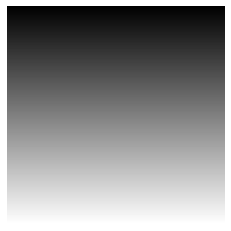

In [19]:
plt.figure()
plt.imshow(omega, cmap=plt.cm.gray)
plt.axis('off')
plt.show()
plt.close()

In [27]:
# use the ramp on Fourier coefficients to get derivative
dFdr = 2 * np.pi * np.complex(0,1) * omega * F

In [28]:
# getting back to spatial domain
dfdr = np.fft.ifft2(np.fft.ifftshift(dFdr))

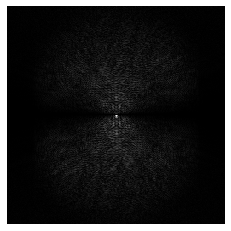

In [29]:
plt.figure()
plt.imshow(np.abs(dFdr), cmap=plt.cm.gray)
plt.axis('off')
plt.show()
plt.close()

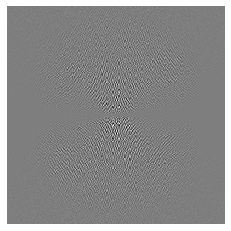

In [30]:
plt.figure()
plt.imshow(np.real(dFdr), cmap=plt.cm.gray)
plt.axis('off')
plt.show()
plt.close()

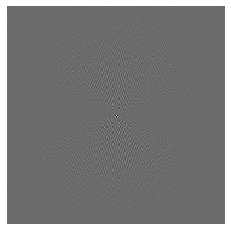

In [31]:
plt.figure()
plt.imshow(np.imag(dFdr), cmap=plt.cm.gray)
plt.axis('off')
plt.show()
plt.close()

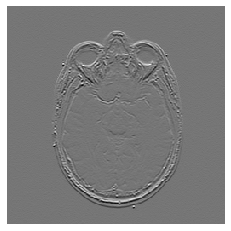

In [32]:
plt.figure()
plt.imshow(np.real(dfdr), cmap=plt.cm.gray)
plt.axis('off')
plt.show()
plt.close()

In [62]:
# combining the blurring and the derivative operations
F = np.fft.fft2(f + np.random.randn(f.shape[0], f.shape[1]) * 10)

# define normalized 2D gaussian
def gaus2d(x=0, y=0, mx=0, my=0, sx=1, sy=1):
    return 1. / (2. * np.pi * sx * sy) * np.exp(-((x - mx)**2. / (2. * sx**2.) + (y - my)**2. / (2. * sy**2.)))

def Gaussian_noid_2d(x_min, x_max, y_min, y_max, mx=0, my=0, sx=1, sy=1):
    x = np.arange(x_min, x_max)
    y = np.arange(y_min, y_max)
    x, y = np.meshgrid(x, y) # get 2D variables instead of 1D
    noise_2d = gaus2d(x, y, mx, my, sx, sy)
    return x, y, noise_2d

g = Gaussian_noid_2d(-f.shape[0]//2, f.shape[0]//2, -f.shape[1]//2, f.shape[1]//2, sx=2, sy=2)

In [63]:
g = g[-1]

In [64]:
dgdr = 0.5 * (np.roll(g, -1, axis=0) - np.roll(g, 1, axis=0))

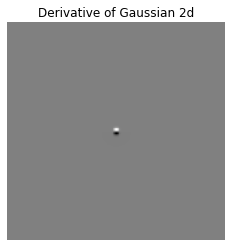

In [65]:
plt.figure()
plt.imshow(dgdr, cmap=plt.cm.gray)
plt.title('Derivative of Gaussian 2d')
plt.axis('off')
plt.show()
plt.close()

In [66]:
# shift Gaussian to upper-left, then take DFT
dGdr = np.fft.fft2(np.fft.ifftshift(dgdr))

In [67]:
dFdr = F * dGdr

In [86]:
dfdr = np.fft.ifft2(np.fft.fftshift(dFdr))

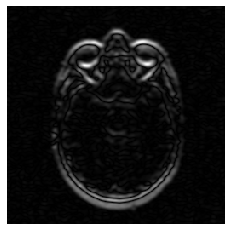

In [87]:
plt.figure()
plt.imshow(np.abs(dfdr), cmap=plt.cm.gray)
plt.axis('off')
plt.show()
plt.close()